<a href="https://colab.research.google.com/github/Pimateos/Fork/blob/master/deep_learning_solucion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

# MNIST DNN

Redes profundas, activaciones y métodos de inicialización de pesos

Vamos a cargar un dataset de datos MNIST, correspondiente a números manuscritos con unas dimensiones de 28x28 pixels. El dataset se divide en :


*   Conjunto de entrenamiento (train)
*   Conjunto de test(test)

A su vez, en ambos tenemos los valores x_ correspondientes a las variables e y_ correspondiente a la variable objetivo, que pretendemos predecir.




In [5]:
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [6]:
np.prod(x_train.shape[1:])
len(x_train)


60000

TensorFlow sólo reconoce tensores de floats (vectores). Por esta razón, lo primero que se hace es transformarlo en un vector con elementos de tipo float32.  Adicionalmente, las imagenes (x_) son divididas por 255 para que todos los valores se encuentren entre 0 y 1. Se les modifica las dimensiones, aplanandolas, es decir, los 784(28x28) pixels aparecen para cada registro y transformando en la codificación one-hot las distintas posibles clasificaciones (0-9 números)

In [0]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Ahora vamos a crear la red neuronal densa. Para ello, definimos que tiene en su capa de entrada 784 variables de entrada y una capa de salida con 10 posibles clasificaciones. En la capa de salida se utiliza la función de activación sigmoidal, porque se trata de un problema de clasificación.

Entre la capa de entrada y salida tenemos 3 capas densas con 100 neuronas cada una. Estas capas tienen como función de activación una función tangente hiperbólica y para inicializar los pesos de la capa utiliza una función aleatoria con una distribución uniforme. 

Las capas se van uniendo entre ellas pasando el tensor que devuelve cada capa. 

Finalmente, se crea el modelo mlp con la estructura de red neuronal densa creada y las salidas.

In [0]:
from keras.layers import Input, Dense
from keras.models import Model

x = Input(shape=(784,))
z = Dense(100, activation='tanh', kernel_initializer='random_uniform')(x)
z = Dense(100, activation='tanh', kernel_initializer='random_uniform')(z)
z = Dense(100, activation='tanh', kernel_initializer='random_uniform')(z)
y = Dense(10, activation='sigmoid')(z)

mlp = Model(x, y)

Una vez creado el modelo, tenemos que compilarlo y definimos la funcion de perdida como categorical_crossentropy, que es indicada para clasificaciones y como función de optimización el gradiente descendiente.

In [0]:
mlp.compile(optimizer='sgd', loss='categorical_crossentropy')

Con el modelo creado, vamos a entrenarlo, vamos a hacer 10 iteracciones con un tamaño de batch de 256 registros y vamos a introducirlos en la red aleatoriamente entre las neuronas para que no se establezca un orden.

In [10]:
mlp.fit(x_train, y_train,
        epochs=10,
        batch_size=256,
        shuffle=True)

Epoch 1/10
60000/60000 [==============================] - 2s 34us/step - loss: 2.2932
Epoch 2/10
60000/60000 [==============================] - 2s 26us/step - loss: 2.2641
Epoch 3/10
60000/60000 [==============================] - 2s 25us/step - loss: 2.2042
Epoch 4/10
60000/60000 [==============================] - 1s 25us/step - loss: 2.0704
Epoch 5/10
60000/60000 [==============================] - 1s 25us/step - loss: 1.8878
Epoch 6/10
60000/60000 [==============================] - 1s 25us/step - loss: 1.7163
Epoch 7/10
60000/60000 [==============================] - 1s 25us/step - loss: 1.5225
Epoch 8/10
60000/60000 [==============================] - 1s 24us/step - loss: 1.3087
Epoch 9/10
60000/60000 [==============================] - 1s 25us/step - loss: 1.1412
Epoch 10/10
60000/60000 [==============================] - 1s 24us/step - loss: 1.0169


Una vez entrenado el modelo, vamos a evaluar con el dataset de test y vamos a ver su accuracy, midiendo como la eficacia de nuestro modelo.


In [11]:
mlp.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 29us/step


0.9513498230934143

# **MNIST  CNN**

Ahora vamos a realizar el mismo problema de clasificación, pero con una red convolucional


In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import Adam
from keras.models import model_from_json
from keras.callbacks import ReduceLROnPlateau, TensorBoard, EarlyStopping, ModelCheckpoint
from keras.models import load_model
from keras import regularizers
import numpy as np
batch_size = 128
num_classes = 10
epochs = 100

Using TensorFlow backend.


In [0]:
import keras
from keras.datasets import mnist
#load mnist dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data() #everytime loading data won't be so easy :)

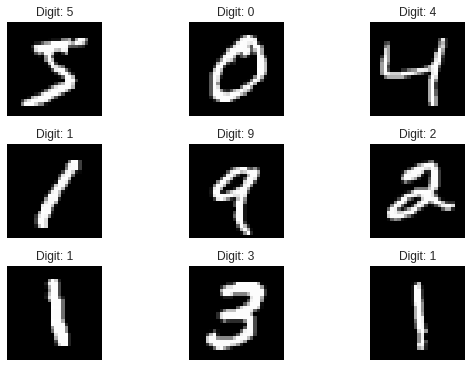

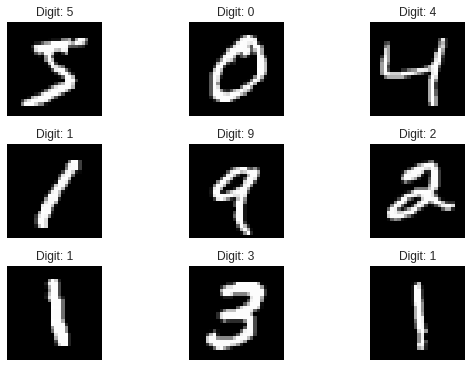

In [30]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [46]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print (train_images.shape)
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

(60000, 28, 28)


In [45]:
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                10250     
Total params: 62,346
Trainable params: 62,346
Non-trainable params: 0
_________________________________________________________________


In [0]:
batch_size = 100
epochs = 5

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(train_images, train_labels,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1
          )

Epoch 1/5
60000/60000 [==============================] - 79s 1ms/step - loss: 0.9726 - acc: 0.7476
Epoch 2/5
 1400/60000 [..............................] - ETA: 1:16 - loss: 0.2827 - acc: 0.9221

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)